# Raudhatul Jannah
# PYTN-KS19-09
# Python for Data Science by Hacktiv8
# **Final Projects 4**

## **Perkenalan**
<hr>

**Outline Notebook**
1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data Cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan
g pada data yang diberikandit card service for user

**Projects Overview**
 Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data
 ini memiliki 18 atribut

**Attribute Information:**
 1. CUSTID- Identification of Credit Card holder (Categorical)
 2. BALANCE- Balance amount left in their account to make purchases (
 3. BALANCEFREQUENCY- How frequently the Balance is updated, score between 0
 and 1 (1 = frequently updated, 0 = not frequently updated)
 4. PURCHASES- Amount of purchases made from account
 5. ONEOFFPURCHASES- Maximum purchase amount done in one-go
 6. INSTALLMENTSPURCHASES- Amount of purchase done in installment
 7. CASHADVANCE- Cash in advance given by the user
 8. PURCHASESFREQUENCY- How frequently the Purchases are being made, score
 between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
 9. ONEOFFPURCHASESFREQUENCY- How frequently Purchases are happening in
 one-go (1 = frequently purchased, 0 = not frequently purchased)
 10. PURCHASESINSTALLMENTSFREQUENCY- How frequently purchases in
 installments are being done (1 = frequently done, 0 = not frequently done)
 11. CASHADVANCEFREQUENCY- How frequently the cash in advance being paid
 12. CASHADVANCETRX- Number of Transactions made with "Cash in Advance"
 13. PURCHASESTRX- Number of purchase transactions made
 14. CREDITLIMIT- Limit of Credit Card for user
 15. PAYMENTS- Amount of Payment done by user
 16. MINIMUM_PAYMENTS- Minimum amount of payments made by user
 17. PRCFULLPAYMENT- Percent of full payment paid by user
 18. TENURE- Tenure of credit card service for user

**Objektif**
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
1. Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
2. Mampu mempersiapkan data untuk digunakan dalam Clustering
3. Mampu mengimplementasikan Clustering pada data yang diberikan

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import f1_score, average_precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, normalize,RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split

from umap import UMAP

import warnings
warnings.filterwarnings("ignore")

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Loading & Atibute Description

In [3]:
# Mengimpor dataset
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
df.shape

(8950, 18)

Terdapat 8950 baris dan 18 kolom

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Data Cleaning

In [8]:
# Describe the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
# Custom colors
class clr:
    S = '\033[1m' + '\033[92m'
    E = '\033[0m' 

# Check the missing data
print(df.isnull().sum())
print(clr.S+'----------------------------------------\n Percentage of missing data: \n'+clr.E)
print((df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum()/df['CUST_ID'].count())*100) 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
----------------------------------------
 Percentage of missing data: 

MINIMUM_PAYMENTS    3.497207
CREDIT_LIMIT        0.011173
dtype: float64


In [10]:
print(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum())
# print(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull())

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
dtype: int64


In [11]:
print(df['CUST_ID'].count())

8950


Dilanjutkan dengan mengisi missing elements dengan nilai rata-rata dari setiap variabel

<!-- dilanjutkan dengan mengisi missing elements dengan nilai rata2 dari setiap variabel -->

In [12]:
# Fill up the missing elements with mean of the MINIMUM_PAYMENTS
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 
                  'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

# Fill up the missing elements with mean of the CREDIT_LIMIT
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 
                  'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Chek duplicated entries in the data
df2 = df.copy()
print(clr.S+'Duplicated in this dataset:'+clr.E, df.duplicated().sum())

Duplicated in this dataset: 0


tidak terdapat duplikasi data

Menghapus kolom customer id

In [14]:
# Drop Customer ID column 'CUST_ID'
df2.drop('CUST_ID', axis = 1, inplace = True)
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
# Get the column names
df2.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Data Exploration

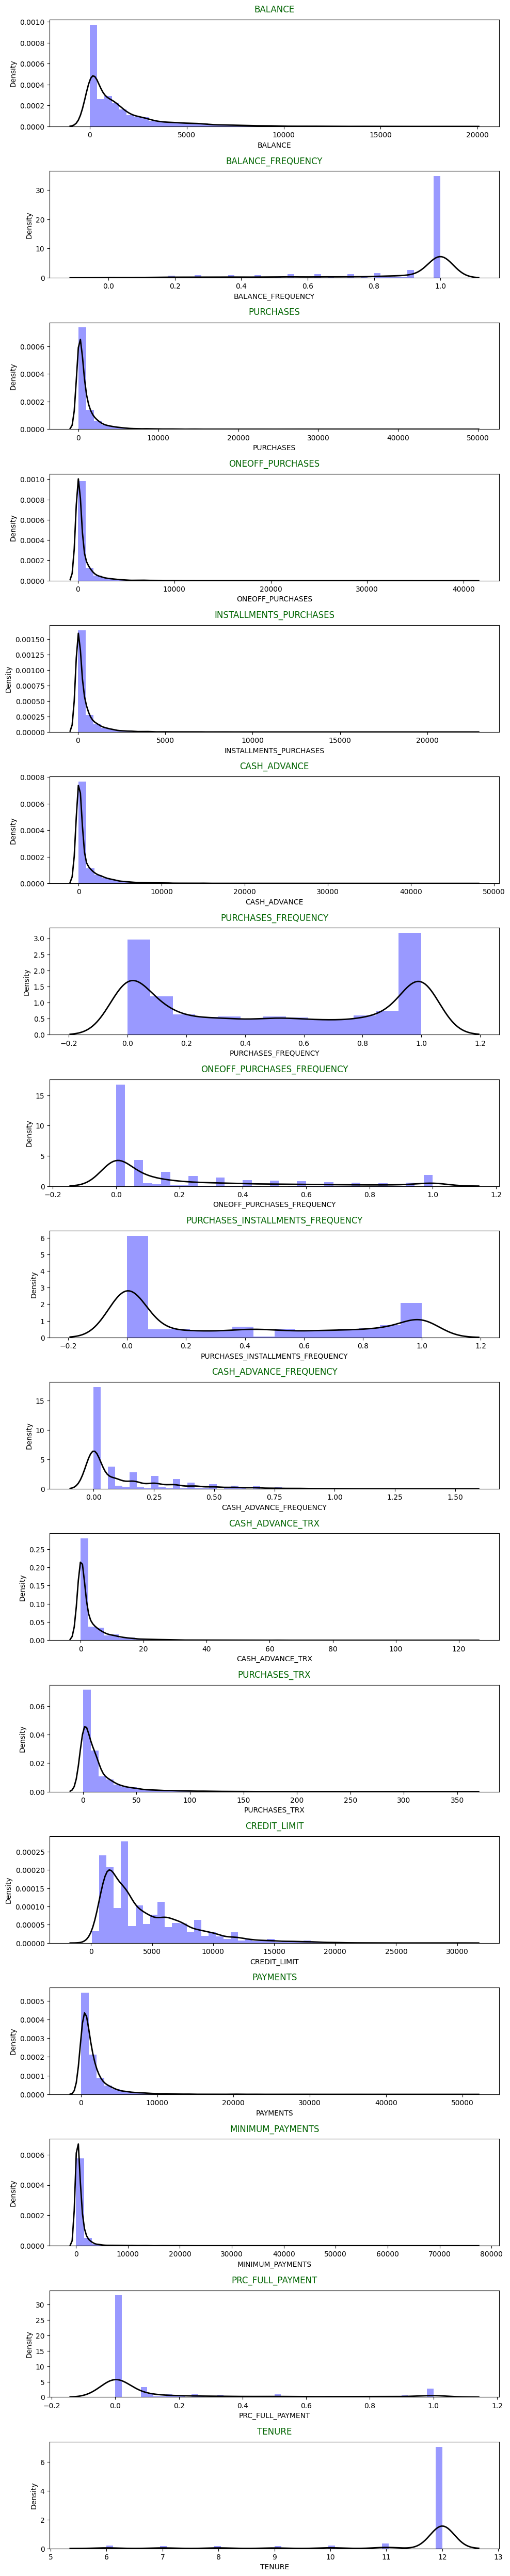

In [16]:
# Plot the distribution
plt.figure(figsize = (10,50))
for i in range(len(df2.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df2[df2.columns[i]], 
                 kde_kws={'color':'black', 'lw':2, 'label':'KDE'}, hist_kws={'color':'blue'})                 
    plt.title(df2.columns[i], color= 'darkgreen', y=1.03)
plt.tight_layout()

Kebanyakan kolom ini memiliki banyak outlier, dibuktikan dari beberapa grafik nya yang skew negatif dan positif dan tidak terdistribusi di tengah(normal distribution), maka dalam kasus akan melakukan normalisasi data menggunakan robust scaler disebabkan robust scaler akan melakukan normalisasi data dengan memperhitungkan nilai outliernya.

# Data Preprocessing

In [17]:
# Scale the data first
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df2)
df_scaled.shape

(8950, 17)

In [18]:
df_scaled

array([[-0.43226678, -1.63636364, -0.24837108, ..., -0.28285691,
         0.        ,  0.        ],
       [ 1.20937371, -0.81818182, -0.33748873, ...,  1.06254141,
         1.55555556,  0.        ],
       [ 0.84209923,  0.        ,  0.38476593, ...,  0.42064894,
         0.        ,  0.        ],
       ...,
       [-0.44135471, -1.5000045 , -0.20259786, ..., -0.36519846,
         1.75000175, -6.        ],
       [-0.44651662, -1.5000045 , -0.33748873, ..., -0.40365347,
         1.75000175, -6.        ],
       [-0.25997614, -3.        ,  0.68376779, ..., -0.35673145,
         0.        , -6.        ]])

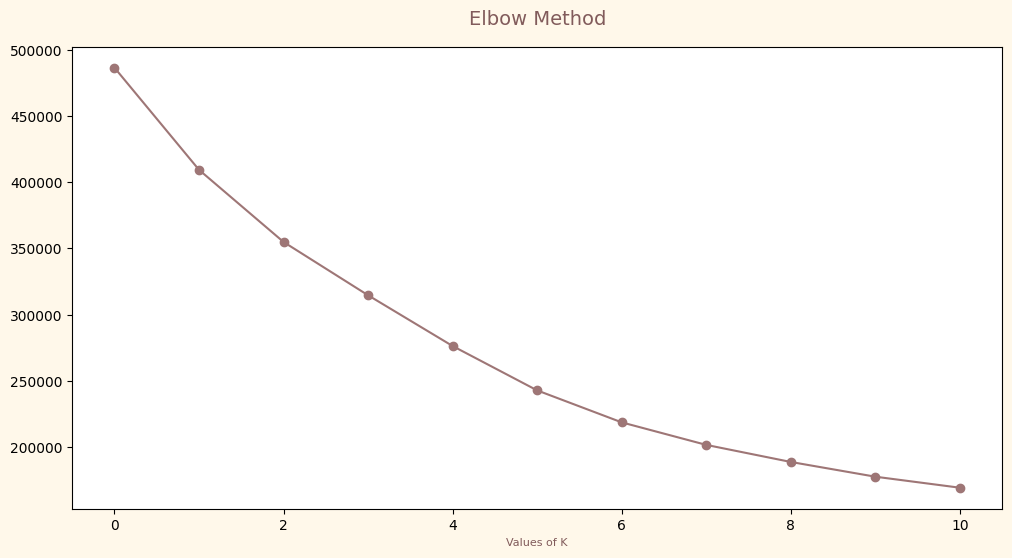

In [19]:
scores_1 = []
range_values = range(1,12)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

plt.figure(figsize = (12,6), facecolor = '#FFF8EA') 
plt.plot(scores_1, 'bx-', marker = 'o', color = '#9E7676')
plt.xlabel('Values of K', fontsize = 8, color='#815B5B')
plt.title('Elbow Method', fontsize = 14, color='#815B5B', y=1.03);

Klaster ke-4 tampaknya membentuk siku-siku dari kurva. Namun, nilai-nilai tersebut tidak berkurang secara linear hingga klaster ke-8.

# Data Modelling

## K-Means


In [20]:
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(df_scaled)
labels = kmeans.labels_ # Labels (cluster) associated to each data point

kmeans.cluster_centers_.shape

(7, 17)

In [21]:
labels[0:11]

array([0, 6, 0, 2, 0, 0, 4, 0, 0, 2, 0])

In [22]:
kmeans.cluster_centers_[0:6]

array([[ 2.96471034e-01, -2.26812462e-01,  2.01707978e-01,
         4.86626410e-01,  3.61606100e-01,  4.87939318e-01,
        -5.27629352e-02,  2.99057392e-01,  2.17270138e-01,
         5.42744623e-01,  5.50585031e-01,  2.11594715e-01,
         1.22113379e-01,  1.11450043e-01,  5.05408009e-01,
         2.30704264e-01, -4.09320153e-01],
       [-3.90867185e-01, -1.24847918e+00,  7.48060772e-01,
         7.96938834e-01,  1.22700779e+00,  4.57370005e-02,
         3.59144046e-01,  6.02611807e-01,  6.10155894e-01,
         5.05075518e-02,  4.58874459e-02,  7.17424242e-01,
         3.38095747e-01,  3.17456944e-01, -2.24966688e-01,
         5.46693956e+00, -5.87012987e-01],
       [-3.72143791e-01, -5.68639250e+00, -4.54952639e-02,
         2.57955833e-01,  7.94007771e-02,  3.86689125e-01,
        -2.71827105e-01, -4.27701679e-02,  4.55807256e-02,
         2.33871700e-01,  2.68579686e-01, -1.58495045e-01,
         1.18946506e-01,  1.31795194e-01, -6.57546395e-02,
         7.32936271e-01, -7.6

In [23]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = [df2.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.296471,-0.226812,0.201708,0.486626,0.361606,0.487939,-0.052763,0.299057,0.217270,0.542745,0.550585,0.211595,0.122113,0.111450,0.505408,0.230704,-0.409320
1,-0.390867,-1.248479,0.748061,0.796939,1.227008,0.045737,0.359144,0.602612,0.610156,0.050508,0.045887,0.717424,0.338096,0.317457,-0.224967,5.466940,-0.587013
2,-0.372144,-5.686393,-0.045495,0.257956,0.079401,0.386689,-0.271827,-0.042770,0.045581,0.233872,0.268580,-0.158495,0.118947,0.131795,-0.065755,0.732936,-0.762180
3,1.751176,-0.102273,0.703218,0.243235,1.806570,1.143341,-0.023701,-0.092441,0.363997,0.522322,0.901786,0.756696,0.303025,0.700995,32.586170,0.010417,-0.089286
4,1.085043,-0.138277,4.903571,6.308467,3.930611,0.556595,0.517643,2.068973,0.771545,0.339008,0.471304,4.083804,1.070594,2.862563,1.400609,1.562793,-0.088696
5,2.455144,-0.412810,26.186841,39.522445,11.622427,0.910565,0.480909,2.532830,0.705050,0.187500,0.465909,7.443182,2.629870,17.972329,4.526802,3.665121,-0.090909
6,1.918089,-0.348060,0.126348,0.450158,0.234116,4.642401,-0.240878,0.192025,0.044753,2.240958,3.932238,0.074756,0.923387,2.060973,1.978925,0.313048,-0.648871


In [32]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Fit the KMeans model
y_kmeans = kmeans.fit_predict(df_scaled)
# Calculate Silhoutte Score
score = silhouette_score(df_scaled, kmeans.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.413


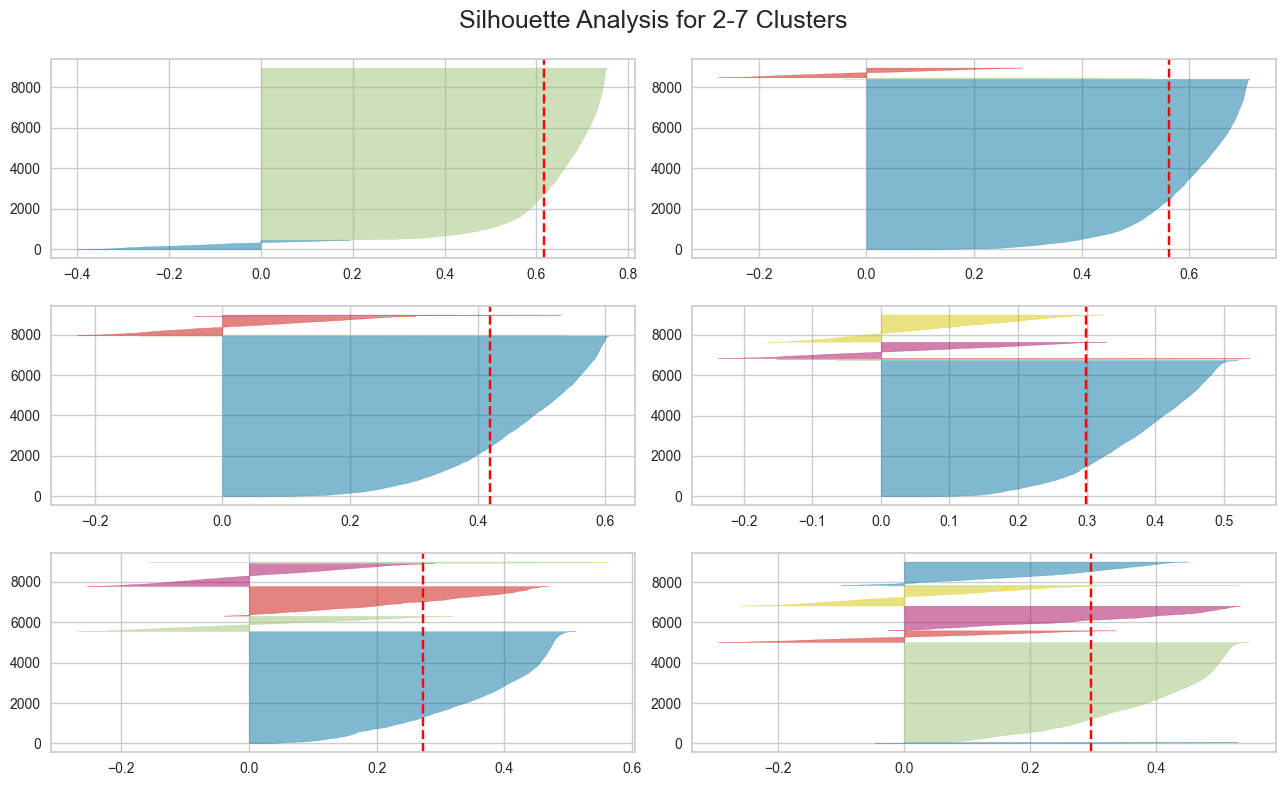

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

# Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier.
# You can find the code to simply create Silhouette visualisation for K-Means clusters with n_cluster as 2, 3, 4, 5, 6, 7 below.

fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

dari shilouettescore ini dapat meketahui bahwa cluster ke 5 mendekati 6 lah yang lebih optimal, karna memiliki lebih sedikit distribusi yang mengarah ke nilai negatif. 

# Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

K-MEANS CLUSTERING
- Melihat Jumlah clusters yang optimal dengan menggunakan elbow method

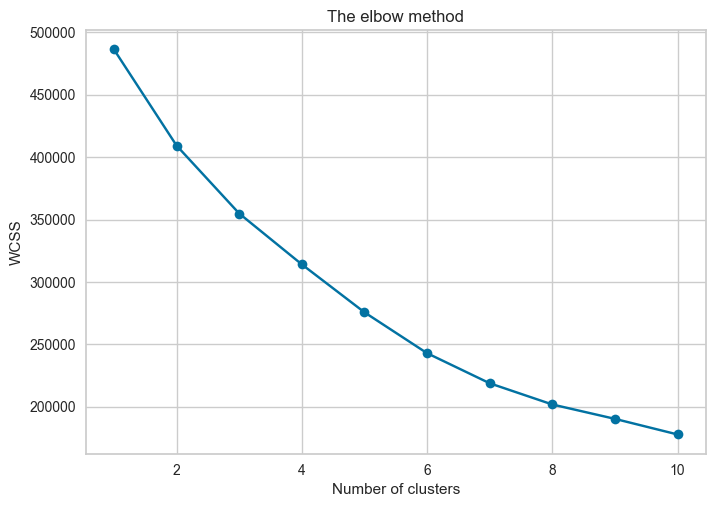

In [28]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


- Melatih model KMeans dengan n_clusters sebanyak 4

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=3)

-  Menambahkan KMeans Segment pada dataframe

In [30]:
data_kmeans = df.copy()
data_kmeans['KMeans Segment'] = kmeans.labels_

- Melihat informasi data KMeans dengan melakukan groupby berdasarkan rata-rat KMeans segment

In [36]:
# Identify the problematic column
problematic_column = 'KMeans Segment'

# Check the data type of the column
print(data_kmeans[problematic_column].dtype)

# Convert the column to numeric, coercing errors to NaN
data_kmeans[problematic_column] = pd.to_numeric(data_kmeans[problematic_column], errors='coerce')

# Check the data type again
print(data_kmeans[problematic_column].dtype)

int32
int32


Dari hasil grouping segment KMeans, selanjutnya membuat kesimpulan tentang segment tersebut dan memberi nama pada segment tersebut.

Disini Penarikan Tunai berkaitan dengan penggunaan kartu kredit dengan penarikan tunai yang biasanya dikenakan biaya dan memiliki tingkat bunga.

- Melakukan pemberian nama pada segment

In [39]:
data_kmeans.rename({0:'Pengguna Level Tengah (Middle Ground)', 
                           1:'Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)', 
                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans Segment
Pengguna Level Tengah (Middle Ground),C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers),C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users),C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
Pengguna Kredit Hemat (Frugal Credit Users),C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


- Memasukkan Label KMeans Segment ke dalam dataframe dengan membuat kolom baru

In [40]:
data_kmeans['Labels'] = data_kmeans['KMeans Segment'].map({0:'Pengguna Level Tengah (Middle Ground)', 
                                                           1:'Pengguna dengan Kredit Pembelian Tinggi (High Credit Frequent Purchasers)', 
                                                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                                                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

data_kmeans.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans Segment,Labels
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...


Analisis Segment K-Means

Melakukan plotting atribut pada segment KMeans yang membagi data serta melihat perbedaan antara segmen pelanggan.

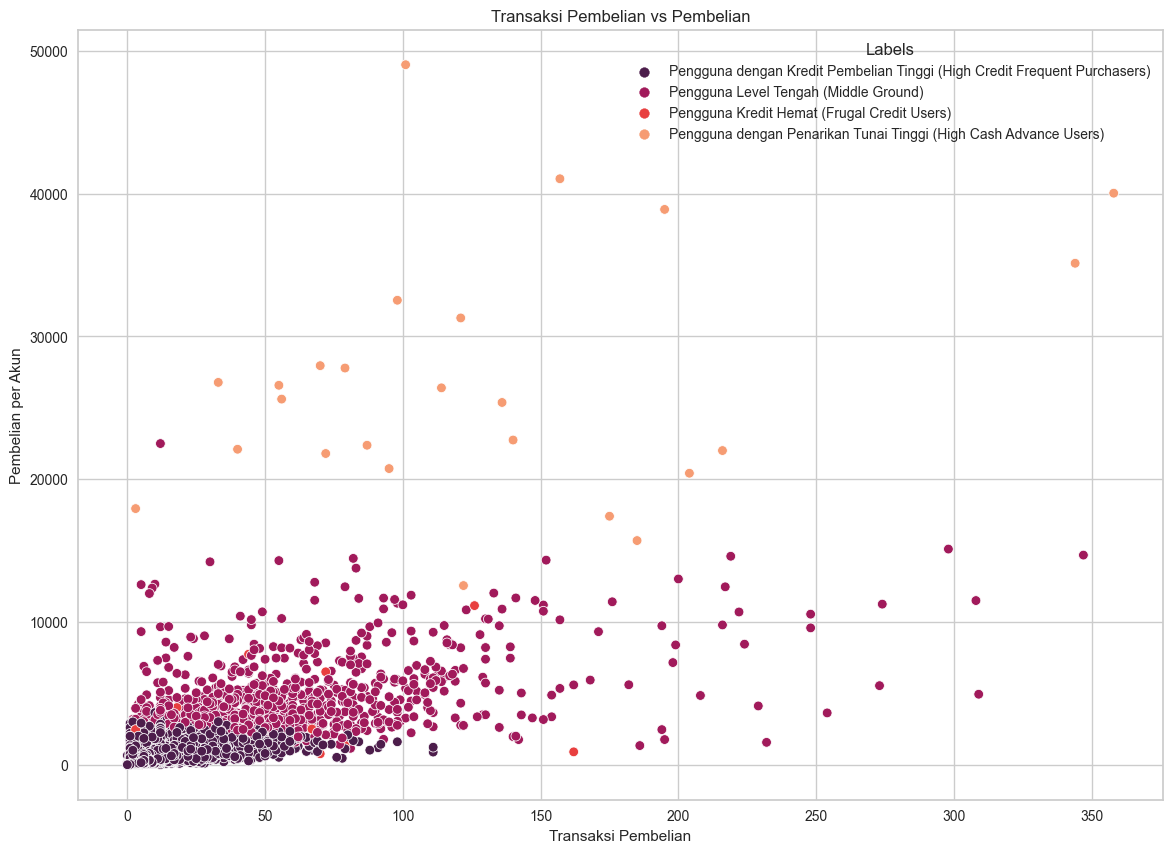

<Figure size 800x550 with 0 Axes>

In [41]:
#sekarang kita dapat mengilustrasikan grup berdasarkan beberapa fitur dalam scatterplot

plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_TRX']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Transaksi Pembelian')
g.set_ylabel('Pembelian per Akun')
g.set_title('Transaksi Pembelian vs Pembelian')
plt.show()

plt.savefig("Transaksi Pembelian vs Pembelian KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

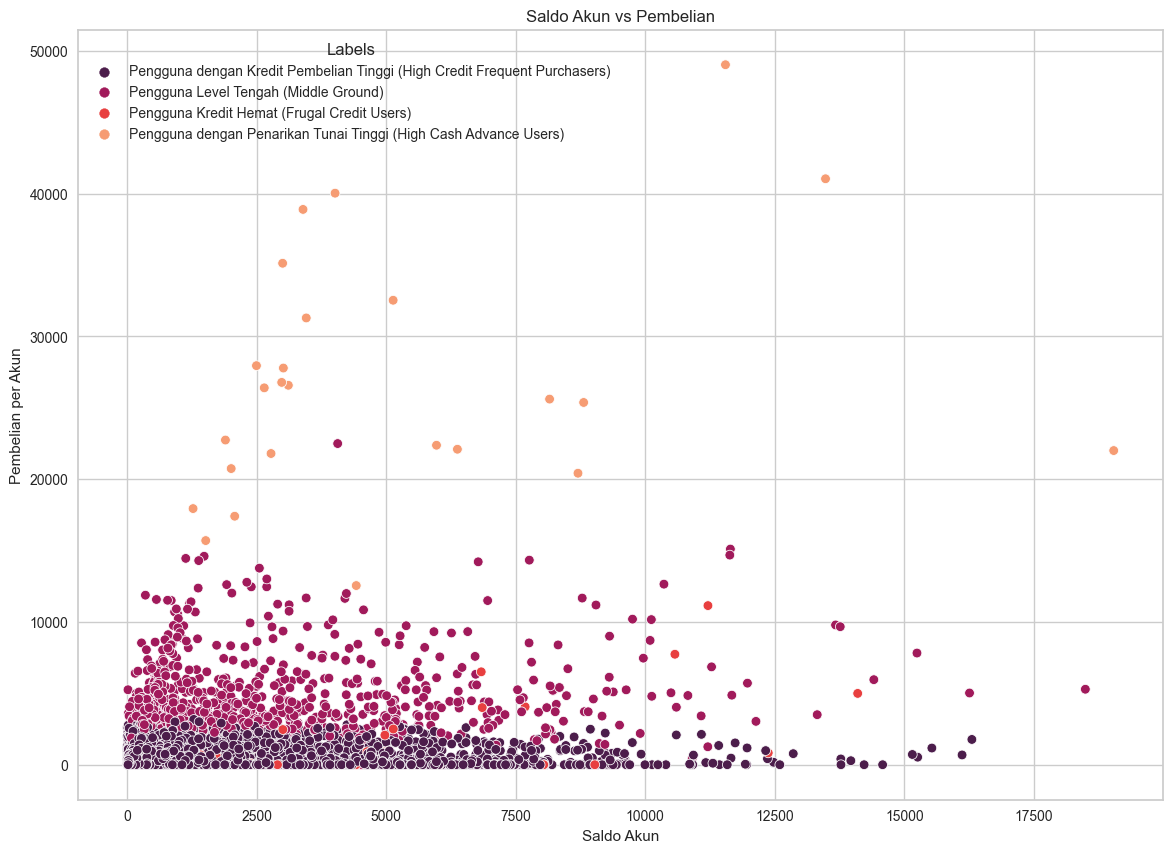

<Figure size 800x550 with 0 Axes>

In [42]:
plt.figure(figsize=(14,10))
X = data_kmeans['BALANCE']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Saldo Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Saldo Akun vs Pembelian')
plt.show()

plt.savefig("Saldo Akun vs Pembelian KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

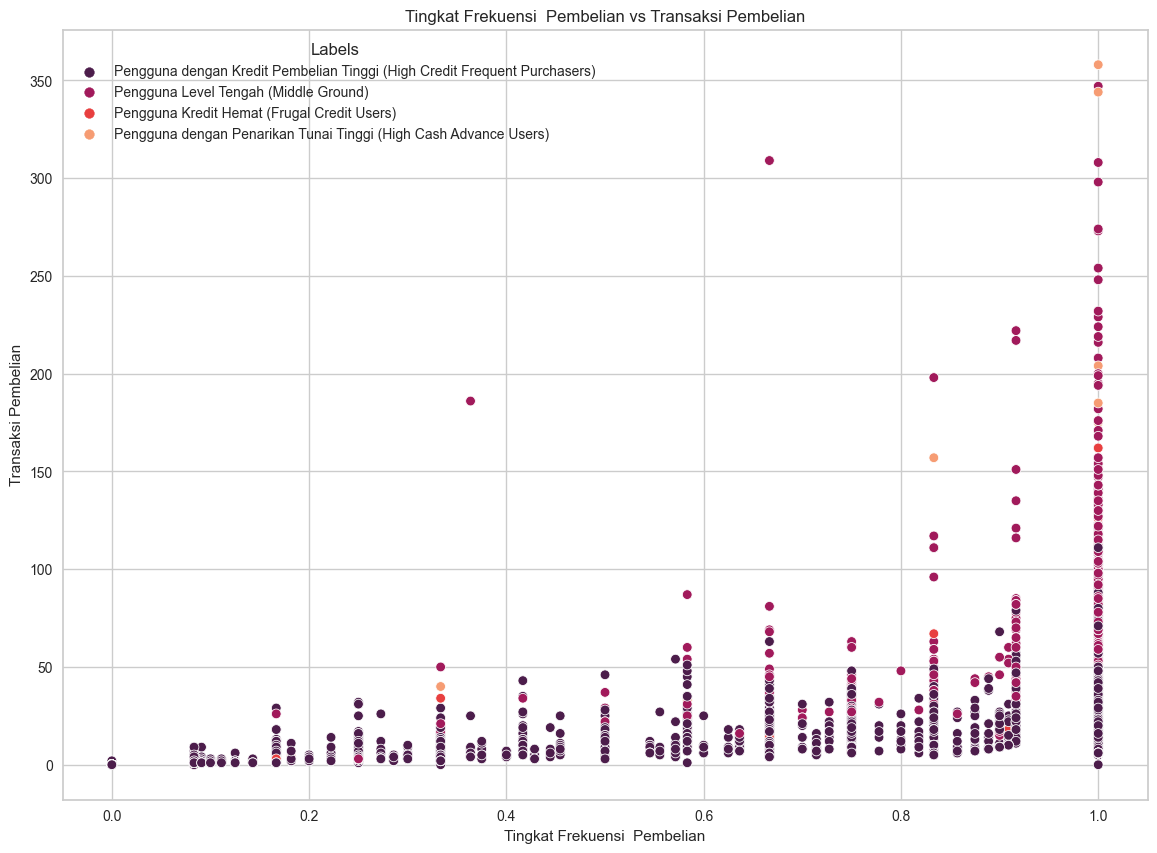

<Figure size 800x550 with 0 Axes>

In [43]:
plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_FREQUENCY']
Y = data_kmeans['PURCHASES_TRX']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Tingkat Frekuensi  Pembelian')
g.set_ylabel('Transaksi Pembelian')
g.set_title('Tingkat Frekuensi  Pembelian vs Transaksi Pembelian')
plt.show()

plt.savefig("Tingkat Frekuensi  Pembelian vs Transaksi Pembelian KMeans.png")

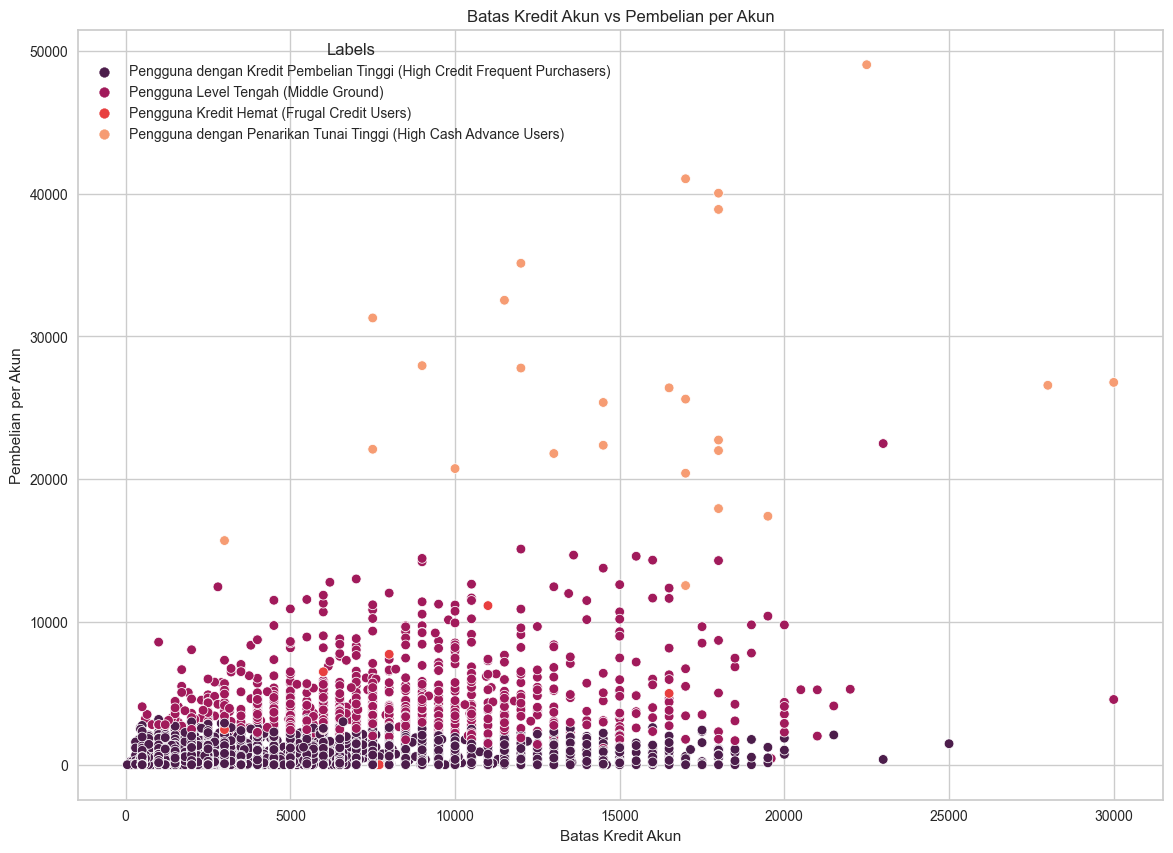

<Figure size 800x550 with 0 Axes>

In [44]:
plt.figure(figsize=(14,10))
X = data_kmeans['CREDIT_LIMIT']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Batas Kredit Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Batas Kredit Akun vs Pembelian per Akun')
plt.show()

plt.savefig("Batas Kredit Akun vs Pembelian per Akun KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            orientation ='landscape')

PCA (Principal Component Analysis)

In [45]:
pca = PCA()
pca

PCA()

In [46]:
principalComponents = pca.fit_transform(df_scaled)

- Melihat nilai variance ratio dari pca

In [47]:
pca.explained_variance_ratio_

array([3.07006673e-01, 2.19398406e-01, 1.27415073e-01, 8.47722617e-02,
       7.33397573e-02, 5.58395398e-02, 3.43372493e-02, 2.75921597e-02,
       2.12030154e-02, 1.56138249e-02, 1.16627738e-02, 9.05979478e-03,
       5.04479469e-03, 4.09889568e-03, 3.38117030e-03, 2.33584081e-04,
       1.02692480e-06])

- Visualisai Principal Components Variance untuk melihat nilai dari components beserta besarnya variance yang ditangkap

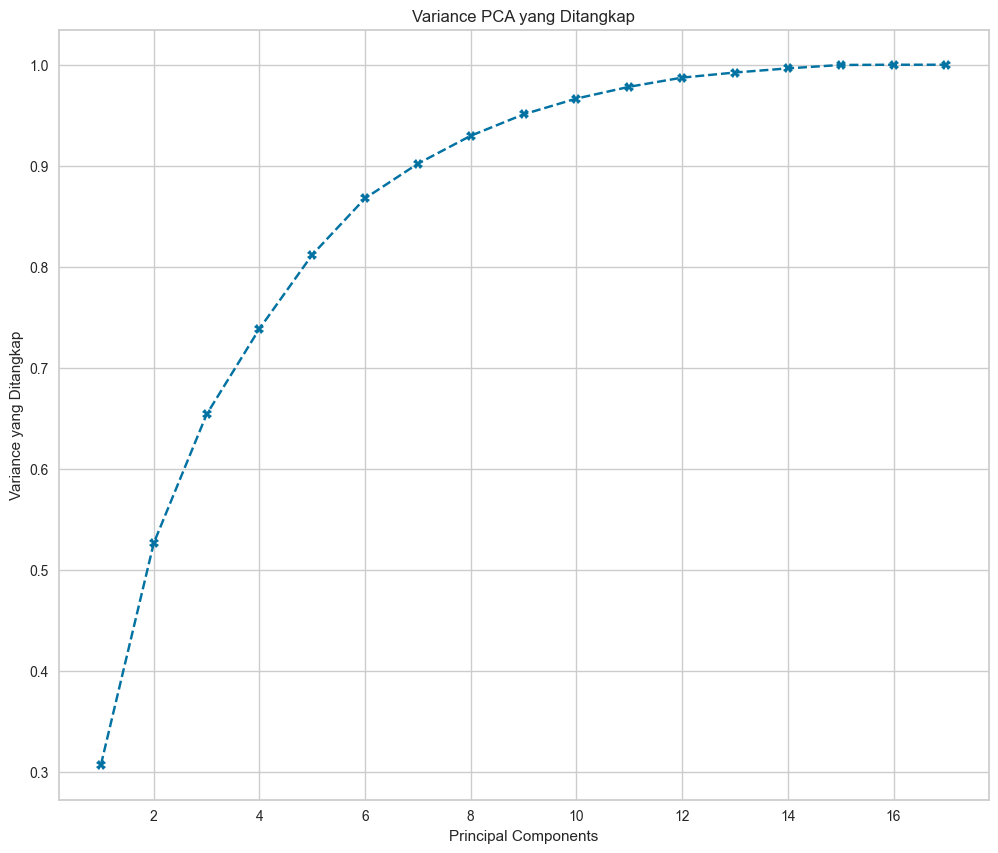

In [48]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='X', linestyle='--', )
plt.title('Variance PCA yang Ditangkap')
plt.xlabel('Principal Components')
plt.ylabel('Variance yang Ditangkap')
plt.show()


# Kesimpulan

Analisa ini menggunakan model KMeans dan PCA dalam melakukan clustering pada data pengguna kartu kredit di KMeans memilih 4 cluster berdasarkan pengamatan pada elbow method dan membuat beberapa visualisasi menggunakan lineplot, boxplot, histogram, pie chart, dan juga melakukan beberapa contoh groupby dan query terhadap data yang ada.